In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# SSVEP Dataset

This is an EEG signal dataset collected when 11 subjects were exposed to stimuli for approximately 4 seconds. We collected information from two platforms: VR and SC. It is a dataset that includes EEG stimuli from a total of 6 channels-occipital lobe, partietal lobe (Oz, O1, O2, Pz, P3, P4).

- Data Shape: Target Freq (labels; 7, 11 Hz), Trial (Full 30), Channel (3~6), Length (4s)
    - Area: All [default, 6 channel O+P], O (O Channels, 3), P (P Channels, 3)
    - platform: Sc (Screen, Traditional with High Acc), VR (Peripheral, Novel approach with weak stimuli than Sc)
    - partNum: ['P02', 'P01', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10', 'P11', 'P12']

In [6]:
FNAME = "{pid}_SSVEP ({platform}_{area})"
df = pd.read_csv("../dataset/metadata.csv",index_col=0)

In [13]:
df.head()

,pid,platform,area
0,P01,Sc,O
1,P01,VR,P
2,P01,VR,O
3,P01,VR,All
4,P01,Sc,All


In [7]:
df_target = df[df['area'] == "All"]
df_target.head()

,pid,platform,area
3,P01,VR,All
4,P01,Sc,All
9,P02,Sc,All
10,P02,VR,All
13,P04,VR,All


In [9]:
instance = df_target.loc[10]
f_name = FNAME.format_map(instance)
f_name

'P02_SSVEP (VR_All)'

In [10]:
one_data = np.load(os.path.join("../dataset/npy", f_name + ".npy"))

# Signal Viz

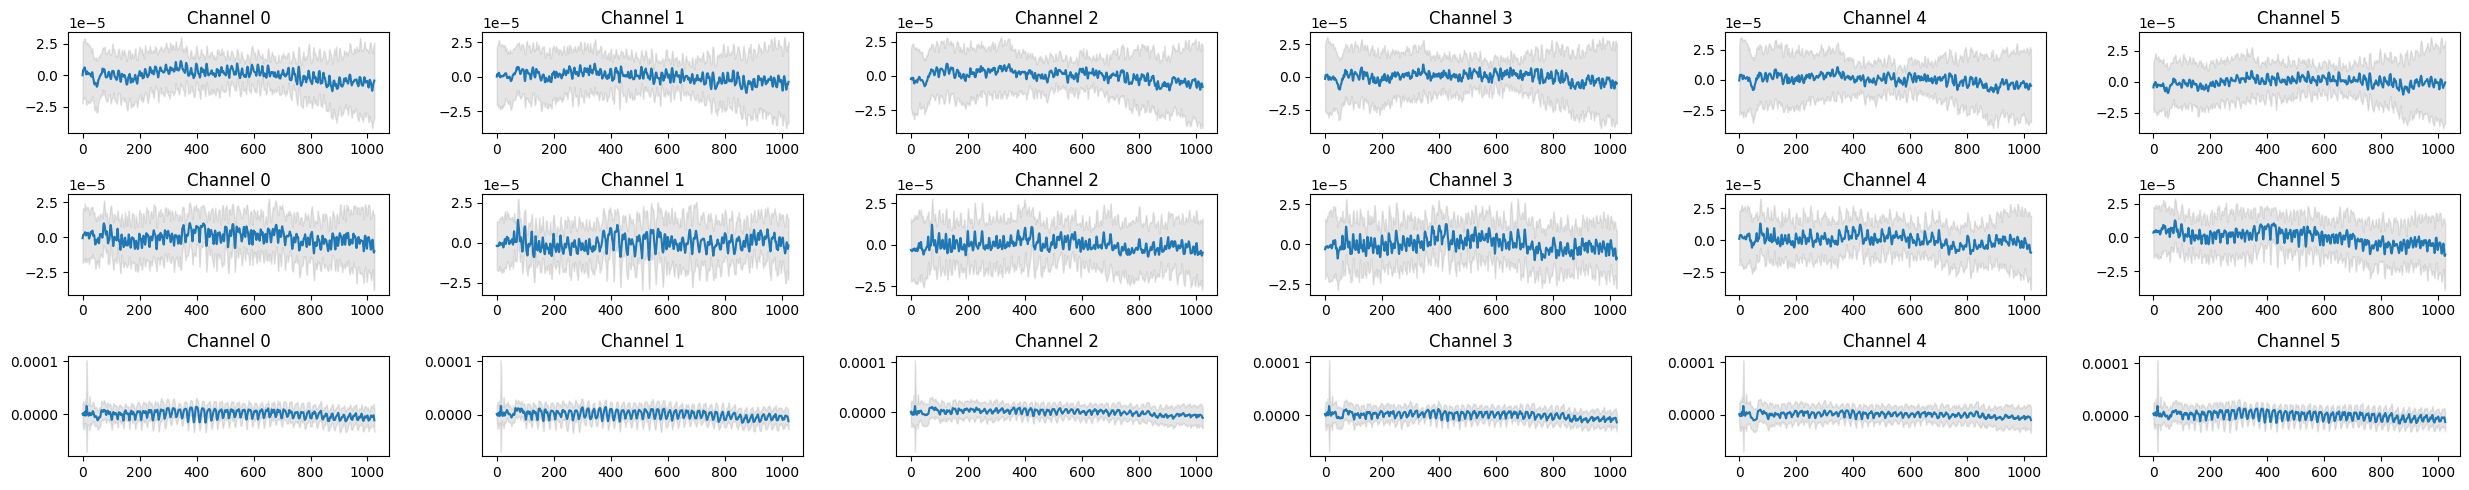

In [11]:
# 시각화 시작
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(25, 5))

for i, eeg_data in enumerate(one_data):
    mean_eeg = np.mean(eeg_data, axis=0)  # shape: 6 channels x 1025 samples
    std_eeg = np.std(eeg_data, axis=0)   # shape: 6 channels x 1025 samples
    for j in range(6):  # 각 channel에 대해서
        axes[i,j].plot(mean_eeg[j, :], label='mean')
        axes[i,j].fill_between(range(1025),
                             mean_eeg[j, :] - std_eeg[j, :],
                             mean_eeg[j, :] + std_eeg[j, :],
                             color='gray', alpha=0.2, label='std')
        axes[i,j].set_title(f'Channel {j}')
plt.tight_layout()
plt.show()

# Spec Viz

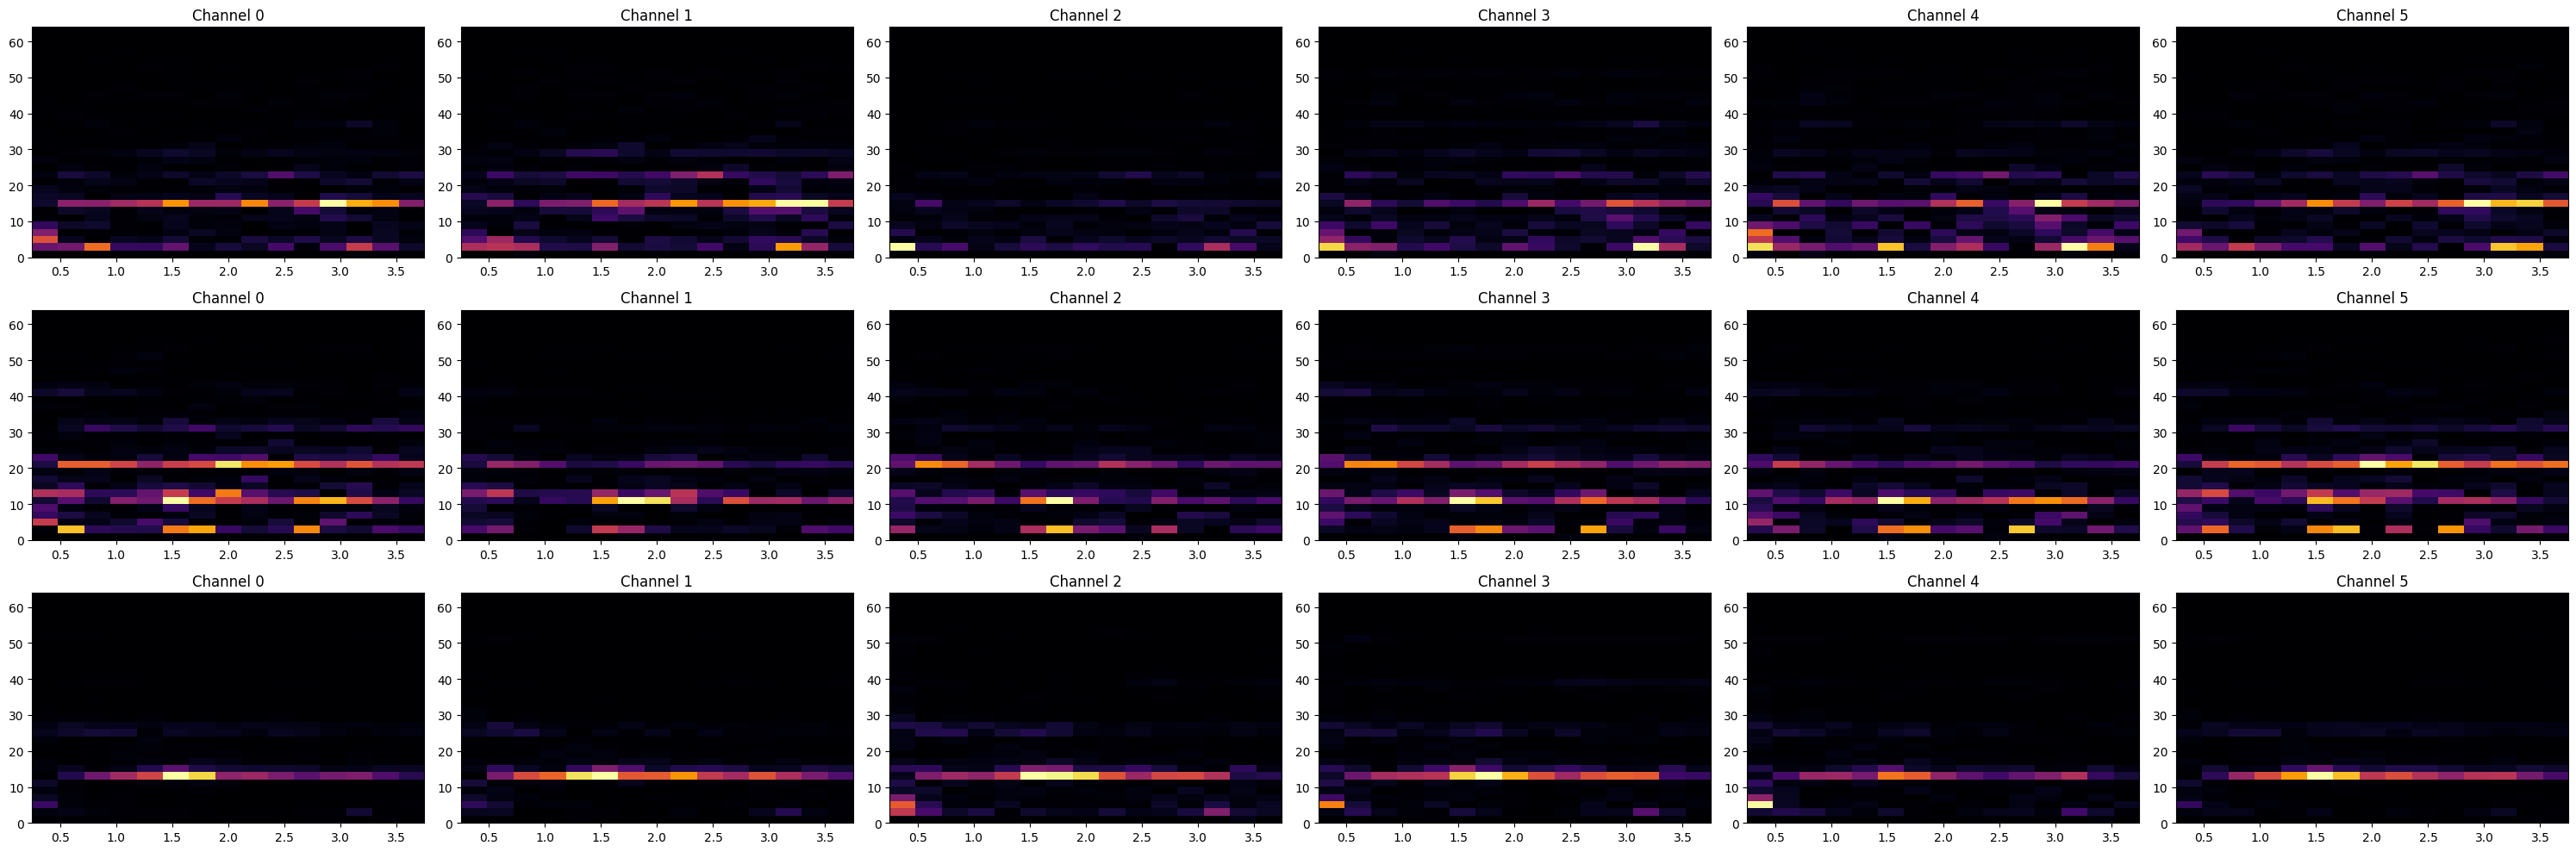

In [12]:
from scipy.signal import spectrogram

# 샘플링 레이트 설정
sampling_rate = 256  # Hz

# 각 trial에 대한 평균을 계산
hop_size = int(0.25 * sampling_rate)  # 샘플

# 시각화 시작
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(30, 10))
for i, eeg_data in enumerate(one_data):
    mean_eeg = np.mean(eeg_data, axis=0)  # shape: 6 channels x 1025 samples
    # 각 subplot에 데이터 표시
    for j in range(6):  # 각 channel에 대해서
        f, t, Sxx = spectrogram(mean_eeg[j, :], fs=sampling_rate, nperseg=128, noverlap=128 - hop_size)
        idx = np.where((f >= 0) & (f <= 128))[0]
        low_freq = len(idx) // 2
        axes[i,j].imshow(Sxx[:low_freq, :], aspect='auto', cmap='inferno', origin='lower',
                       extent=[t.min(), t.max(), f[idx][0], f[idx][low_freq]])
        axes[i,j].set_title(f'Channel {j}')
    # 레이아웃 자동 조정
plt.tight_layout()
plt.show()